# 测试验证彩票预测的模型-1

In [1]:
# 依赖倒入
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
plt.rcParams['font.sans-serif'] = ['Songti SC']

In [3]:
data = pd.read_csv("../cleaned_data.csv", index_col="date")
data.head()

,first,second,third,fourth,fifth,sixth,seventh
date,,,,,,,
2007-05-30,22,24,29,31,35,4,11
2007-06-02,15,22,31,34,35,5,12
2007-06-04,3,4,18,23,32,1,6
2007-06-06,6,10,16,17,25,2,4
2007-06-09,1,9,19,20,30,2,11


In [4]:
# 获取1号球
first_ball_num = data.loc[:, "first"]

In [5]:
# 数据归一化
first_ball_normal = (first_ball_num - 1)/30

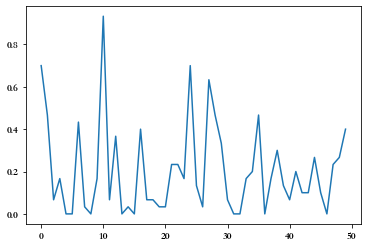

In [6]:
# 1号球前50条数据展示
fig1 = plt.figure()
plt.plot([i for i in range(50)], first_ball_normal[:50])
plt.show()

In [7]:
# 定义数据抽取方法
def data_extract(data, time_step=10):
    x = []
    y = []
    for i in range(len(data) - time_step):
        x.append([a for a in data[i: i + time_step]])
        y.append(data[i+time_step])
    x = np.array(x).reshape(len(x), len(x[0]), features)
    y = np.array(y).reshape(len(y), 1)
    return x,y

In [8]:
# 将数据拆分两部分（训练集和测试集）
features = 1
time_step = 10
train_data = first_ball_normal.iloc[:(len(first_ball_normal)-400)]
test_data = first_ball_normal.iloc[(len(first_ball_normal)-400):]

In [9]:
# 抽取数据
x_train, y_train = data_extract(train_data, time_step)
x_test, y_test = data_extract(test_data, time_step)

In [10]:
# 建立LSTM模型
model = Sequential()
model.add(LSTM(units=40, input_shape=(10, 1), activation="relu"))
model.add(Dense(units=1, activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=2000)

Epoch 1/2000
27/27 [==============================] - 1s 4ms/step - loss: 0.0436 - mse: 0.0436
Epoch 2/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293
Epoch 3/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0303 - mse: 0.0303
Epoch 4/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0289 - mse: 0.0289
Epoch 5/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0299 - mse: 0.0299
Epoch 6/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285
Epoch 7/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293
Epoch 8/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0305 - mse: 0.0305
Epoch 9/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0301 - mse: 0.0301
Epoch 10/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0267 - mse: 0.0267
Epoch 11/2000
27/27 [============================

27/27 [==============================] - 0s 3ms/step - loss: 0.0319 - mse: 0.0319
Epoch 87/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285
Epoch 88/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293
Epoch 89/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0298 - mse: 0.0298
Epoch 90/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0320 - mse: 0.0320
Epoch 91/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.0286
Epoch 92/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0295 - mse: 0.0295
Epoch 93/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0278 - mse: 0.0278
Epoch 94/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.0282
Epoch 95/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285
Epoch 96/2000
27/27 [==============================] -

27/27 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290
Epoch 171/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0296 - mse: 0.0296
Epoch 172/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0294 - mse: 0.0294
Epoch 173/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288
Epoch 174/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291
Epoch 175/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0268 - mse: 0.0268
Epoch 176/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293
Epoch 177/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0297 - mse: 0.0297
Epoch 178/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290
Epoch 179/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0280 - mse: 0.0280
Epoch 180/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0292 - mse: 0.0292
Epoch 255/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0275 - mse: 0.0275
Epoch 256/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.0286
Epoch 257/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0276 - mse: 0.0276
Epoch 258/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0273 - mse: 0.0273
Epoch 259/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0272 - mse: 0.0272
Epoch 260/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0280 - mse: 0.0280
Epoch 261/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0274 - mse: 0.0274
Epoch 262/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0300 - mse: 0.0300
Epoch 263/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0296 - mse: 0.0296
Epoch 264/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0299 - mse: 0.0299
Epoch 339/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0271 - mse: 0.0271
Epoch 340/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0296 - mse: 0.0296
Epoch 341/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288
Epoch 342/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0289 - mse: 0.0289
Epoch 343/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291
Epoch 344/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.0282
Epoch 345/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0272 - mse: 0.0272
Epoch 346/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0278 - mse: 0.0278
Epoch 347/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0299 - mse: 0.0299
Epoch 348/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0264 - mse: 0.0264
Epoch 423/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0264 - mse: 0.0264
Epoch 424/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0269 - mse: 0.0269
Epoch 425/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0281 - mse: 0.0281
Epoch 426/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0279 - mse: 0.0279
Epoch 427/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0270 - mse: 0.0270
Epoch 428/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0274 - mse: 0.0274
Epoch 429/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0261 - mse: 0.0261
Epoch 430/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0270 - mse: 0.0270
Epoch 431/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0269 - mse: 0.0269
Epoch 432/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0276 - mse: 0.0276
Epoch 507/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0262 - mse: 0.0262
Epoch 508/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0246 - mse: 0.0246
Epoch 509/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0266 - mse: 0.0266
Epoch 510/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0248 - mse: 0.0248
Epoch 511/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0268 - mse: 0.0268
Epoch 512/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0270 - mse: 0.0270
Epoch 513/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0251 - mse: 0.0251
Epoch 514/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0278 - mse: 0.0278
Epoch 515/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0274 - mse: 0.0274
Epoch 516/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0249 - mse: 0.0249
Epoch 591/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0228 - mse: 0.0228
Epoch 592/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0247 - mse: 0.0247
Epoch 593/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - mse: 0.0243
Epoch 594/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0240 - mse: 0.0240
Epoch 595/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0248 - mse: 0.0248
Epoch 596/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0250 - mse: 0.0250
Epoch 597/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0256 - mse: 0.0256
Epoch 598/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0250 - mse: 0.0250
Epoch 599/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0249 - mse: 0.0249
Epoch 600/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0240 - mse: 0.0240
Epoch 675/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0233 - mse: 0.0233
Epoch 676/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0233 - mse: 0.0233
Epoch 677/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - mse: 0.0243
Epoch 678/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0222 - mse: 0.0222
Epoch 679/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0244 - mse: 0.0244
Epoch 680/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0259 - mse: 0.0259
Epoch 681/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0208 - mse: 0.0208
Epoch 682/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0225 - mse: 0.0225
Epoch 683/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - mse: 0.0243
Epoch 684/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0236 - mse: 0.0236
Epoch 759/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0227 - mse: 0.0227
Epoch 760/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - mse: 0.0243
Epoch 761/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0220 - mse: 0.0220
Epoch 762/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0233 - mse: 0.0233
Epoch 763/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0224 - mse: 0.0224
Epoch 764/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0209 - mse: 0.0209
Epoch 765/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0231 - mse: 0.0231
Epoch 766/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0215 - mse: 0.0215
Epoch 767/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0231 - mse: 0.0231
Epoch 768/2000
27/27 [=======================

27/27 [==============================] - 0s 4ms/step - loss: 0.0208 - mse: 0.0208
Epoch 843/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0201 - mse: 0.0201
Epoch 844/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0208 - mse: 0.0208
Epoch 845/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0215 - mse: 0.0215
Epoch 846/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0208 - mse: 0.0208
Epoch 847/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0199 - mse: 0.0199
Epoch 848/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0201 - mse: 0.0201
Epoch 849/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0210 - mse: 0.0210
Epoch 850/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0211 - mse: 0.0211
Epoch 851/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0202 - mse: 0.0202
Epoch 852/2000
27/27 [=======================

27/27 [==============================] - 0s 5ms/step - loss: 0.0201 - mse: 0.0201
Epoch 927/2000
27/27 [==============================] - 0s 5ms/step - loss: 0.0197 - mse: 0.0197
Epoch 928/2000
27/27 [==============================] - 0s 5ms/step - loss: 0.0205 - mse: 0.0205
Epoch 929/2000
27/27 [==============================] - 0s 5ms/step - loss: 0.0205 - mse: 0.0205
Epoch 930/2000
27/27 [==============================] - 0s 5ms/step - loss: 0.0183 - mse: 0.0183
Epoch 931/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0195 - mse: 0.0195
Epoch 932/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0203 - mse: 0.0203
Epoch 933/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0189 - mse: 0.0189
Epoch 934/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0200 - mse: 0.0200
Epoch 935/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0185 - mse: 0.0185
Epoch 936/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181
Epoch 1011/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181
Epoch 1012/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0179 - mse: 0.0179
Epoch 1013/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0185 - mse: 0.0185
Epoch 1014/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0175 - mse: 0.0175
Epoch 1015/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174
Epoch 1016/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0171 - mse: 0.0171
Epoch 1017/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183
Epoch 1018/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0173 - mse: 0.0173
Epoch 1019/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0191 - mse: 0.0191
Epoch 1020/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183
Epoch 1094/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1095/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0172 - mse: 0.0172
Epoch 1096/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0165 - mse: 0.0165
Epoch 1097/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0162 - mse: 0.0162
Epoch 1098/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0168 - mse: 0.0168
Epoch 1099/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0171 - mse: 0.0171
Epoch 1100/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0168 - mse: 0.0168
Epoch 1101/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0175 - mse: 0.0175
Epoch 1102/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174
Epoch 1103/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0149 - mse: 0.0149
Epoch 1177/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0157 - mse: 0.0157
Epoch 1178/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160
Epoch 1179/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0152 - mse: 0.0152
Epoch 1180/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1181/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1182/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0162 - mse: 0.0162
Epoch 1183/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0158 - mse: 0.0158
Epoch 1184/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154
Epoch 1185/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0149 - mse: 0.0149
Epoch 1186/2000
27/27 [=============

27/27 [==============================] - 0s 4ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1260/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0133 - mse: 0.0133
Epoch 1261/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1262/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0149 - mse: 0.0149
Epoch 1263/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0126 - mse: 0.0126
Epoch 1264/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0145 - mse: 0.0145
Epoch 1265/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 1266/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0144 - mse: 0.0144
Epoch 1267/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0147 - mse: 0.0147
Epoch 1268/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154
Epoch 1269/2000
27/27 [=============

27/27 [==============================] - 0s 4ms/step - loss: 0.0126 - mse: 0.0126
Epoch 1343/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1344/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1345/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1346/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1347/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0157 - mse: 0.0157
Epoch 1348/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1349/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0133 - mse: 0.0133
Epoch 1350/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0133 - mse: 0.0133
Epoch 1351/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1352/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0116 - mse: 0.0116
Epoch 1426/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1427/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1428/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0115
Epoch 1429/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1430/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117
Epoch 1431/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0107 - mse: 0.0107
Epoch 1432/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1433/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1434/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0113 - mse: 0.0113
Epoch 1435/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0104 - mse: 0.0104
Epoch 1509/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 1510/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0111 - mse: 0.0111
Epoch 1511/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 1512/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0116 - mse: 0.0116
Epoch 1513/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109
Epoch 1514/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109
Epoch 1515/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0123 - mse: 0.0123
Epoch 1516/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109
Epoch 1517/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109
Epoch 1518/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 1592/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 1593/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0106 - mse: 0.0106
Epoch 1594/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 1595/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0108 - mse: 0.0108
Epoch 1596/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0105
Epoch 1597/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0108 - mse: 0.0108
Epoch 1598/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 1599/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 1600/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0101 - mse: 0.0101
Epoch 1601/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 1675/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 1676/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 1677/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091
Epoch 1678/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 1679/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0090 - mse: 0.0090
Epoch 1680/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 1681/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0106 - mse: 0.0106
Epoch 1682/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 1683/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0102 - mse: 0.0102
Epoch 1684/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 1758/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 1759/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0085 - mse: 0.0085
Epoch 1760/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 1761/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 1762/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 1763/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 1764/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093
Epoch 1765/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 1766/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079
Epoch 1767/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0090 - mse: 0.0090
Epoch 1841/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 1842/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 1843/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 1844/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0075 - mse: 0.0075
Epoch 1845/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0080 - mse: 0.0080
Epoch 1846/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 1847/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 1848/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 1849/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 1850/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 1924/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 1925/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 1926/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071
Epoch 1927/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0080 - mse: 0.0080
Epoch 1928/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 1929/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0078 - mse: 0.0078
Epoch 1930/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0078 - mse: 0.0078
Epoch 1931/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 1932/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 1933/2000
27/27 [=============

In [13]:
y_train_predict = model.predict(x_train)

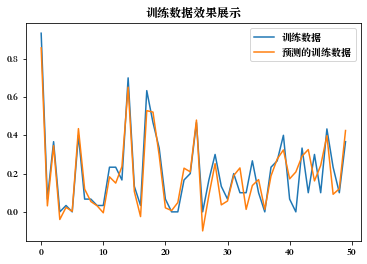

In [14]:
# 训练数据效果展示
fig2 = plt.figure()
plt.plot(y_train[:50], label="训练数据")
plt.plot(y_train_predict[:50], label="预测的训练数据")
plt.title("训练数据效果展示")
plt.legend()
plt.show()

In [15]:
y_test_predict = model.predict(x_test)

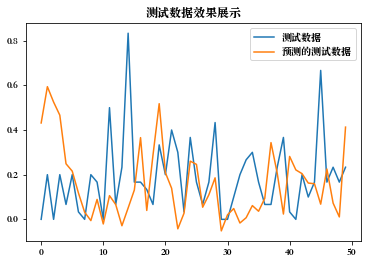

In [16]:
# 测试数据效果展示
fig3 = plt.figure()
plt.plot(y_test[:50], label="测试数据")
plt.plot(y_test_predict[:50], label="预测的测试数据")
plt.title("测试数据效果展示")
plt.legend()
plt.show()